In [1]:
import sys
sys.path.append('../')
import src.utils as utils
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
reload(utils)
import scipy.stats as stat

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%config InlineBackend.figure_format = "retina"
import warnings
warnings.filterwarnings("ignore")

import matplotlib
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath,amsfonts}')

In [3]:
default_params = {
'K' : 100,
'mu': 0.01,
't' : 0,
'T' : 1,
'r' : 0.03,
'S' : 100,
'sigma' : 0.1
}

K = default_params['K']
S0 = default_params['S']
t = default_params['t']
T = default_params['T']
r = default_params['r']
sigma = default_params['sigma']
mu = default_params['mu']

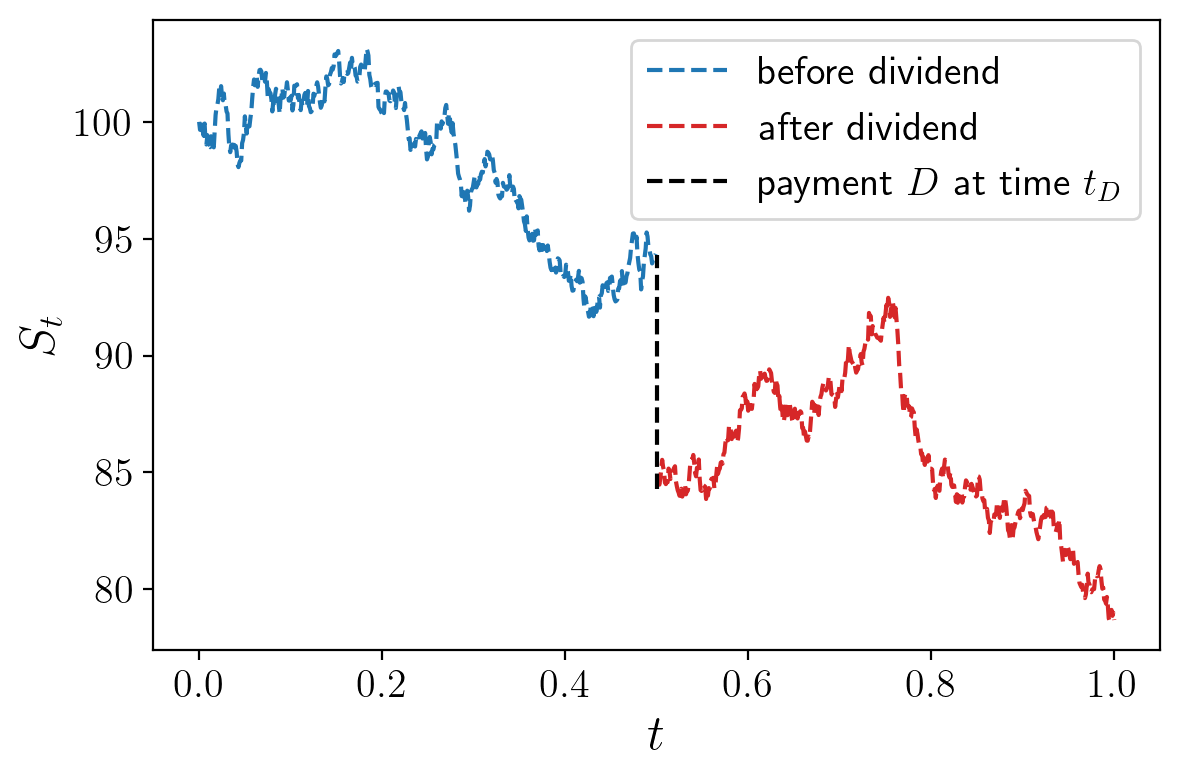

In [9]:
np.random.seed(123)
Nt = 1_000
GBM = utils.GeometricBrownianMotion(x0=S0, mu=mu, sigma = sigma, T= T, Nt = Nt)
timesteps = GBM.timesteps.copy()
path = GBM.simulate()

aux = int(Nt/2)
D = 10.
path[aux:, 0] = path[aux:, 0] - D 

plt.figure()
plt.plot(timesteps[0:aux], path[0:aux,0], linestyle = '--', color='tab:blue', label = 'before dividend')
plt.plot(timesteps[aux+1:], path[aux+1:,0], linestyle = '--', color='tab:red', label = 'after dividend')

plt.vlines(x = timesteps[aux], ymin= path[aux, 0] , ymax= path[aux, 0]  + D, linestyle = '--', color='black', label=r'payment $D$ at time $t_D$')

resolution_value = 50
plt.legend()
plt.ylabel(r'$S_t$',  fontsize=18)
plt.xlabel(r'$t$',  fontsize=18)
plt.tight_layout()
plt.savefig(f'../figures/dividend-payment.pdf', format="pdf", dpi=resolution_value)
plt.show()